In [1]:
import torch
# load data and split into train and test sets
from load_data import sim_arr
from sklearn.model_selection import train_test_split

# reshape from batch, height, width, channel, to batch, channel, height, width
sim_arr_transformed = sim_arr.reshape(
    sim_arr.shape[0], sim_arr.shape[3], sim_arr.shape[1], sim_arr.shape[2])
train_set, test_set = train_test_split(
    sim_arr_transformed, test_size=0.2, random_state=42)

# convert to tensor
train_set = torch.tensor(train_set, dtype=torch.float32)
test_set = torch.tensor(test_set, dtype=torch.float32)



In [2]:
from AE_torch import Autoencoder
from search_space import search_space
import optuna
import warnings


warnings.filterwarnings("ignore")


def objective(trial):
    #clear clutter from previous runs
    torch.cuda.empty_cache()

    # define search space
    num_layers, poolsize, channels, kernel_sizes, dilations, activations = search_space(trial, input_dim=3, output_dim=3)

    # define model
    model = Autoencoder(num_layers=num_layers,
                        poolsize=poolsize,
                        channels=channels,
                        kernel_sizes=kernel_sizes,
                        dilations=dilations,
                        activations=activations,
                        epochs=100,
                        batch_size=32,
                        learning_rate=1e-3,
                        data=train_set)
    
    # train model with k-fold cross validation
    val_losses = model.cross_val()
    val_loss = sum(val_losses) / len(val_losses)
    print("Validation loss:", val_loss)
    return val_loss

# delete the study
#optuna.delete_study(study_name="autoencoder_torch1", storage="sqlite:///autoencoder.db")

# define study
study = optuna.create_study(direction="minimize",
                            pruner=optuna.pruners.HyperbandPruner(),
                            study_name="autoencoder_torch3",
                            storage="sqlite:///autoencoder.db",
                            load_if_exists=True)

study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", str(best_params))
print("Best value:", study.best_value)


[I 2024-05-15 02:31:44,512] Using an existing study with name 'autoencoder_torch3' instead of creating a new one.


Fold 1/5
Epoch 1/100 Loss: 6.6898
Epoch 2/100 Loss: 5.4353
Epoch 3/100 Loss: 4.6367
Epoch 4/100 Loss: 4.1498
Epoch 5/100 Loss: 3.8077
Epoch 6/100 Loss: 3.5669
Epoch 7/100 Loss: 3.3906
Epoch 8/100 Loss: 3.2450
Epoch 9/100 Loss: 3.1300
Epoch 10/100 Loss: 3.0352
Epoch 11/100 Loss: 2.9474
Epoch 12/100 Loss: 2.8750
Epoch 13/100 Loss: 2.8096
Epoch 14/100 Loss: 2.7502
Epoch 15/100 Loss: 2.6974
Epoch 16/100 Loss: 2.6494
Epoch 17/100 Loss: 2.6072
Epoch 18/100 Loss: 2.5682
Epoch 19/100 Loss: 2.5375
Epoch 20/100 Loss: 2.5054
Epoch 21/100 Loss: 2.4770
Epoch 22/100 Loss: 2.4545
Epoch 23/100 Loss: 2.4257
Epoch 24/100 Loss: 2.4036
Epoch 25/100 Loss: 2.3851
Epoch 26/100 Loss: 2.3649
Epoch 27/100 Loss: 2.3458
Epoch 28/100 Loss: 2.3268
Epoch 29/100 Loss: 2.3114
Epoch 30/100 Loss: 2.2987
Epoch 31/100 Loss: 2.2830
Epoch 32/100 Loss: 2.2685
Epoch 33/100 Loss: 2.2583
Epoch 34/100 Loss: 2.2474
Epoch 35/100 Loss: 2.2346
Epoch 36/100 Loss: 2.2238
Epoch 37/100 Loss: 2.2094
Epoch 38/100 Loss: 2.2008
Epoch 39/100

[I 2024-05-15 02:37:05,122] Trial 3 finished with value: 1.776595499110408 and parameters: {'kernel_size_0': 2, 'kernel_size_1': 10, 'kernel_size_2': 10, 'kernel_size_3': 4, 'kernel_size_4': 13, 'dilation_0': 1, 'dilation_1': 3, 'dilation_2': 3, 'dilation_3': 2, 'dilation_4': 2, 'activation_0': 'nn.Softplus', 'activation_1': 'nn.SiLU', 'activation_2': 'nn.SELU', 'activation_3': 'nn.SELU', 'activation_4': 'nn.Tanh'}. Best is trial 3 with value: 1.776595499110408.


Validation Loss: 1.7879
Validation loss: 1.776595499110408
Fold 1/5
Epoch 1/100 Loss: 7.5453
Epoch 2/100 Loss: 4.9993
Epoch 3/100 Loss: 4.1229
Epoch 4/100 Loss: 3.7401
Epoch 5/100 Loss: 3.3586
Epoch 6/100 Loss: 3.1139
Epoch 7/100 Loss: 2.9511
Epoch 8/100 Loss: 2.7983
Epoch 9/100 Loss: 2.6604
Epoch 10/100 Loss: 2.7092
Epoch 11/100 Loss: 2.6456
Epoch 12/100 Loss: 2.4352
Epoch 13/100 Loss: 2.3017
Epoch 14/100 Loss: 2.2196
Epoch 15/100 Loss: 2.1636
Epoch 16/100 Loss: 2.1264
Epoch 17/100 Loss: 2.0612
Epoch 18/100 Loss: 2.0259
Epoch 19/100 Loss: 1.9918
Epoch 20/100 Loss: 1.9687
Epoch 21/100 Loss: 1.9293
Epoch 22/100 Loss: 1.9088
Epoch 23/100 Loss: 1.9475
Epoch 24/100 Loss: 1.9964
Epoch 25/100 Loss: 1.9552
Epoch 26/100 Loss: 1.9289
Epoch 27/100 Loss: 1.8947
Epoch 28/100 Loss: 1.8743
Epoch 29/100 Loss: 1.8546
Epoch 30/100 Loss: 1.8357
Epoch 31/100 Loss: 1.8156
Epoch 32/100 Loss: 1.7998
Epoch 33/100 Loss: 1.7811
Epoch 34/100 Loss: 1.7658
Epoch 35/100 Loss: 1.7486
Epoch 36/100 Loss: 1.7279
Epoch

[I 2024-05-15 02:39:53,779] Trial 4 finished with value: 1.588039041822776 and parameters: {'kernel_size_0': 4, 'kernel_size_1': 5, 'kernel_size_2': 21, 'kernel_size_3': 7, 'kernel_size_4': 21, 'dilation_0': 1, 'dilation_1': 5, 'dilation_2': 4, 'dilation_3': 5, 'dilation_4': 5, 'activation_0': 'nn.Softplus', 'activation_1': 'nn.Tanh', 'activation_2': 'nn.SiLU', 'activation_3': 'nn.SELU', 'activation_4': 'nn.Softplus'}. Best is trial 4 with value: 1.588039041822776.


Validation Loss: 1.2335
Validation loss: 1.588039041822776
Fold 1/5
Epoch 1/100 Loss: 2.6121
Epoch 2/100 Loss: 1.5686
Epoch 3/100 Loss: 1.3698
Epoch 4/100 Loss: 1.2557
Epoch 5/100 Loss: 1.2187
Epoch 6/100 Loss: 1.1459
Epoch 7/100 Loss: 1.1056
Epoch 8/100 Loss: 1.0963
Epoch 9/100 Loss: 1.0547
Epoch 10/100 Loss: 1.0122
Epoch 11/100 Loss: 0.9917
Epoch 12/100 Loss: 0.9579
Epoch 13/100 Loss: 0.8992
Epoch 14/100 Loss: 0.8417
Epoch 15/100 Loss: 0.8147
Epoch 16/100 Loss: 0.8014
Epoch 17/100 Loss: 0.7926
Epoch 18/100 Loss: 0.7853
Epoch 19/100 Loss: 0.7423
Epoch 20/100 Loss: 0.7315
Epoch 21/100 Loss: 0.7114
Epoch 22/100 Loss: 0.6968
Epoch 23/100 Loss: 0.6725
Epoch 24/100 Loss: 0.6763
Epoch 25/100 Loss: 0.6657
Epoch 26/100 Loss: 0.6456
Epoch 27/100 Loss: 0.6469
Epoch 28/100 Loss: 0.6295
Epoch 29/100 Loss: 0.6174
Epoch 30/100 Loss: 0.6303
Epoch 31/100 Loss: 0.6037
Epoch 32/100 Loss: 0.5946
Epoch 33/100 Loss: 0.5942
Epoch 34/100 Loss: 0.5801
Epoch 35/100 Loss: 0.5797
Epoch 36/100 Loss: 0.5625
Epoch

[I 2024-05-15 02:42:49,319] Trial 5 finished with value: 0.3946284880628809 and parameters: {'kernel_size_0': 9, 'kernel_size_1': 10, 'kernel_size_2': 13, 'kernel_size_3': 4, 'kernel_size_4': 11, 'dilation_0': 3, 'dilation_1': 2, 'dilation_2': 4, 'dilation_3': 4, 'dilation_4': 2, 'activation_0': 'nn.SELU', 'activation_1': 'nn.Softplus', 'activation_2': 'nn.Tanh', 'activation_3': 'nn.Softplus', 'activation_4': 'nn.Tanh'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.3909
Validation loss: 0.3946284880628809
Fold 1/5
Epoch 1/100 Loss: 4.5412
Epoch 2/100 Loss: 2.8653
Epoch 3/100 Loss: 2.7919
Epoch 4/100 Loss: 2.3816
Epoch 5/100 Loss: 2.0405
Epoch 6/100 Loss: 1.8478
Epoch 7/100 Loss: 1.7407
Epoch 8/100 Loss: 1.5522
Epoch 9/100 Loss: 1.3425
Epoch 10/100 Loss: 1.2298
Epoch 11/100 Loss: 1.2918
Epoch 12/100 Loss: 1.2112
Epoch 13/100 Loss: 1.1386
Epoch 14/100 Loss: 1.1263
Epoch 15/100 Loss: 1.0793
Epoch 16/100 Loss: 1.0801
Epoch 17/100 Loss: 1.1545
Epoch 18/100 Loss: 1.0851
Epoch 19/100 Loss: 1.0539
Epoch 20/100 Loss: 1.0151
Epoch 21/100 Loss: 1.1013
Epoch 22/100 Loss: 1.1681
Epoch 23/100 Loss: 1.0771
Epoch 24/100 Loss: 1.4596
Epoch 25/100 Loss: 1.2485
Early stopping after 25 epochs.
Validation Loss: 1.0977
Fold 2/5
Epoch 1/100 Loss: 1.2058
Epoch 2/100 Loss: 1.1183
Epoch 3/100 Loss: 1.0176
Epoch 4/100 Loss: 1.0269
Epoch 5/100 Loss: 1.0093
Epoch 6/100 Loss: 1.0465
Epoch 7/100 Loss: 1.0053
Epoch 8/100 Loss: 0.9781
Epoch 9/100 Loss: 1.2344


[I 2024-05-15 02:44:59,228] Trial 6 finished with value: 1.0802061130525544 and parameters: {'kernel_size_0': 14, 'kernel_size_1': 9, 'kernel_size_2': 20, 'kernel_size_3': 6, 'kernel_size_4': 6, 'dilation_0': 4, 'dilation_1': 2, 'dilation_2': 2, 'dilation_3': 1, 'dilation_4': 1, 'activation_0': 'nn.SELU', 'activation_1': 'nn.SELU', 'activation_2': 'nn.SELU', 'activation_3': 'nn.Tanh', 'activation_4': 'nn.SELU'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.9435
Validation loss: 1.0802061130525544
Fold 1/5
Epoch 1/100 Loss: 5.4522
Epoch 2/100 Loss: 2.7409
Epoch 3/100 Loss: 2.8150
Epoch 4/100 Loss: 2.7808
Epoch 5/100 Loss: 2.5966
Epoch 6/100 Loss: 2.3377
Epoch 7/100 Loss: 1.9909
Epoch 8/100 Loss: 1.9746
Epoch 9/100 Loss: 1.9641
Epoch 10/100 Loss: 1.7404
Epoch 11/100 Loss: 1.7776
Epoch 12/100 Loss: 1.6524
Epoch 13/100 Loss: 1.5169
Epoch 14/100 Loss: 1.4275
Epoch 15/100 Loss: 1.3789
Epoch 16/100 Loss: 1.3810
Epoch 17/100 Loss: 1.3405
Epoch 18/100 Loss: 1.2969
Epoch 19/100 Loss: 1.2589
Epoch 20/100 Loss: 1.2459
Epoch 21/100 Loss: 1.2574
Epoch 22/100 Loss: 1.2126
Epoch 23/100 Loss: 1.1513
Epoch 24/100 Loss: 1.1213
Epoch 25/100 Loss: 1.1078
Epoch 26/100 Loss: 1.0910
Epoch 27/100 Loss: 1.1533
Epoch 28/100 Loss: 1.1313
Epoch 29/100 Loss: 1.0783
Epoch 30/100 Loss: 1.0417
Epoch 31/100 Loss: 1.0157
Epoch 32/100 Loss: 0.9951
Epoch 33/100 Loss: 0.9887
Epoch 34/100 Loss: 0.9794
Epoch 35/100 Loss: 0.9768
Epoch 36/100 Loss: 0.9623
Epoc

[I 2024-05-15 02:47:49,388] Trial 7 finished with value: 0.9251867908518762 and parameters: {'kernel_size_0': 7, 'kernel_size_1': 11, 'kernel_size_2': 18, 'kernel_size_3': 19, 'kernel_size_4': 12, 'dilation_0': 4, 'dilation_1': 5, 'dilation_2': 4, 'dilation_3': 3, 'dilation_4': 5, 'activation_0': 'nn.Tanh', 'activation_1': 'nn.SiLU', 'activation_2': 'nn.SiLU', 'activation_3': 'nn.Tanh', 'activation_4': 'nn.SiLU'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.7939
Validation loss: 0.9251867908518762
Fold 1/5
Epoch 1/100 Loss: 3.4181
Epoch 2/100 Loss: 1.5370
Epoch 3/100 Loss: 1.2882
Epoch 4/100 Loss: 1.1750
Epoch 5/100 Loss: 1.1112
Epoch 6/100 Loss: 1.1798
Epoch 7/100 Loss: 1.2878
Epoch 8/100 Loss: 1.3336
Epoch 9/100 Loss: 1.2848
Epoch 10/100 Loss: 1.1611
Early stopping after 10 epochs.
Validation Loss: 0.9940
Fold 2/5
Epoch 1/100 Loss: 1.0229
Epoch 2/100 Loss: 0.8935
Epoch 3/100 Loss: 0.8135
Epoch 4/100 Loss: 0.7712
Epoch 5/100 Loss: 0.7231
Epoch 6/100 Loss: 0.7059
Epoch 7/100 Loss: 0.6706
Epoch 8/100 Loss: 0.6514
Epoch 9/100 Loss: 0.6242
Epoch 10/100 Loss: 0.6004
Epoch 11/100 Loss: 0.5944
Epoch 12/100 Loss: 0.5758
Epoch 13/100 Loss: 0.5629
Epoch 14/100 Loss: 0.5651
Epoch 15/100 Loss: 0.5544
Epoch 16/100 Loss: 0.5535
Epoch 17/100 Loss: 0.5498
Epoch 18/100 Loss: 0.5532
Epoch 19/100 Loss: 0.5464
Epoch 20/100 Loss: 0.5470
Epoch 21/100 Loss: 0.5651
Epoch 22/100 Loss: 0.6463
Epoch 23/100 Loss: 0.7011
Epoch 24/100 Loss: 0.6737


[I 2024-05-15 02:49:12,163] Trial 8 finished with value: 0.6075115507235751 and parameters: {'kernel_size_0': 5, 'kernel_size_1': 10, 'kernel_size_2': 15, 'kernel_size_3': 14, 'kernel_size_4': 15, 'dilation_0': 3, 'dilation_1': 5, 'dilation_2': 3, 'dilation_3': 1, 'dilation_4': 3, 'activation_0': 'nn.Tanh', 'activation_1': 'nn.Tanh', 'activation_2': 'nn.SiLU', 'activation_3': 'nn.SELU', 'activation_4': 'nn.SELU'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.4436
Validation loss: 0.6075115507235751
Fold 1/5
Epoch 1/100 Loss: 4.5862
Epoch 2/100 Loss: 2.2612
Epoch 3/100 Loss: 2.9298
Epoch 4/100 Loss: 2.5109
Epoch 5/100 Loss: 1.8865
Epoch 6/100 Loss: 1.6757
Epoch 7/100 Loss: 1.6834
Epoch 8/100 Loss: 5.0643
Epoch 9/100 Loss: 3.6743
Epoch 10/100 Loss: 3.4865
Epoch 11/100 Loss: 2.6655
Early stopping after 11 epochs.
Validation Loss: 2.3785
Fold 2/5
Epoch 1/100 Loss: 2.4429
Epoch 2/100 Loss: 2.3737
Epoch 3/100 Loss: 2.3105
Epoch 4/100 Loss: 3.1063
Epoch 5/100 Loss: 2.7897
Epoch 6/100 Loss: 2.2878
Epoch 7/100 Loss: 1.9903
Epoch 8/100 Loss: 1.7420
Epoch 9/100 Loss: 1.6004
Epoch 10/100 Loss: 1.4358
Epoch 11/100 Loss: 1.3576
Epoch 12/100 Loss: 1.2924
Epoch 13/100 Loss: 1.1784
Epoch 14/100 Loss: 1.1376
Epoch 15/100 Loss: 1.0925
Epoch 16/100 Loss: 1.0853
Epoch 17/100 Loss: 1.0350
Epoch 18/100 Loss: 0.9632
Epoch 19/100 Loss: 1.0114
Epoch 20/100 Loss: 1.1555
Epoch 21/100 Loss: 1.0527
Epoch 22/100 Loss: 0.9653
Epoch 23/100 Loss: 0.9109


[I 2024-05-15 02:53:34,836] Trial 9 finished with value: 0.9762788298539817 and parameters: {'kernel_size_0': 22, 'kernel_size_1': 19, 'kernel_size_2': 6, 'kernel_size_3': 5, 'kernel_size_4': 7, 'dilation_0': 3, 'dilation_1': 1, 'dilation_2': 5, 'dilation_3': 4, 'dilation_4': 5, 'activation_0': 'nn.Tanh', 'activation_1': 'nn.Tanh', 'activation_2': 'nn.SiLU', 'activation_3': 'nn.Softplus', 'activation_4': 'nn.SiLU'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.5504
Validation loss: 0.9762788298539817
Fold 1/5
Epoch 1/100 Loss: 3.3455
Epoch 2/100 Loss: 1.9050
Epoch 3/100 Loss: 1.4794
Epoch 4/100 Loss: 1.3102
Epoch 5/100 Loss: 1.2445
Epoch 6/100 Loss: 1.1688
Epoch 7/100 Loss: 1.0918
Epoch 8/100 Loss: 1.0793
Epoch 9/100 Loss: 1.0480
Epoch 10/100 Loss: 1.0218
Epoch 11/100 Loss: 0.9918
Epoch 12/100 Loss: 0.9393
Epoch 13/100 Loss: 0.9080
Epoch 14/100 Loss: 0.9176
Epoch 15/100 Loss: 0.8143
Epoch 16/100 Loss: 0.7926
Epoch 17/100 Loss: 0.7912
Epoch 18/100 Loss: 0.7657
Epoch 19/100 Loss: 0.7483
Epoch 20/100 Loss: 0.7421
Epoch 21/100 Loss: 0.7308
Epoch 22/100 Loss: 0.7234
Epoch 23/100 Loss: 0.7212
Epoch 24/100 Loss: 0.7083
Epoch 25/100 Loss: 0.7113
Epoch 26/100 Loss: 0.6855
Epoch 27/100 Loss: 0.7008
Epoch 28/100 Loss: 0.6831
Epoch 29/100 Loss: 0.6693
Epoch 30/100 Loss: 0.6763
Epoch 31/100 Loss: 0.6823
Epoch 32/100 Loss: 0.6527
Epoch 33/100 Loss: 0.6452
Epoch 34/100 Loss: 0.6422
Epoch 35/100 Loss: 0.6512
Epoch 36/100 Loss: 0.6179
Epoc

[I 2024-05-15 03:01:03,624] Trial 10 finished with value: 0.4957245118916035 and parameters: {'kernel_size_0': 20, 'kernel_size_1': 21, 'kernel_size_2': 5, 'kernel_size_3': 9, 'kernel_size_4': 11, 'dilation_0': 2, 'dilation_1': 4, 'dilation_2': 2, 'dilation_3': 2, 'dilation_4': 5, 'activation_0': 'nn.SELU', 'activation_1': 'nn.Softplus', 'activation_2': 'nn.Tanh', 'activation_3': 'nn.Tanh', 'activation_4': 'nn.SELU'}. Best is trial 5 with value: 0.3946284880628809.


Validation Loss: 0.5202
Validation loss: 0.4957245118916035
Fold 1/5
Epoch 1/100 Loss: 3.9612
Epoch 2/100 Loss: 1.5917
Epoch 3/100 Loss: 1.3288
Epoch 4/100 Loss: 1.9085
Epoch 5/100 Loss: 2.2713
Epoch 6/100 Loss: 2.2174
Epoch 7/100 Loss: 2.4627
Epoch 8/100 Loss: 1.8628
Early stopping after 8 epochs.
Validation Loss: 1.6298
Fold 2/5
Epoch 1/100 Loss: 1.6024
Epoch 2/100 Loss: 1.4396
Epoch 3/100 Loss: 1.2884
Epoch 4/100 Loss: 1.1644
Epoch 5/100 Loss: 1.0863
Epoch 6/100 Loss: 1.0231
Epoch 7/100 Loss: 0.9752
Epoch 8/100 Loss: 0.9261
Epoch 9/100 Loss: 0.8857
Epoch 10/100 Loss: 0.8512
Epoch 11/100 Loss: 0.8176
Epoch 12/100 Loss: 0.7894
Epoch 13/100 Loss: 0.7620
Epoch 14/100 Loss: 0.7444
Epoch 15/100 Loss: 0.7186
Epoch 16/100 Loss: 0.6986
Epoch 17/100 Loss: 0.6810
Epoch 18/100 Loss: 0.6673
Epoch 19/100 Loss: 0.6527
Epoch 20/100 Loss: 0.6452
Epoch 21/100 Loss: 0.6269
Epoch 22/100 Loss: 0.6175
Epoch 23/100 Loss: 0.6055
Epoch 24/100 Loss: 0.6018
Epoch 25/100 Loss: 0.5903
Epoch 26/100 Loss: 0.5820


In [ ]:
# train model with best hyperparameters
num_layers, poolsize, channels, kernel_sizes, dilations, activations = search_space(
    study.best_trial, input_dim=3, output_dim=3)

model = Autoencoder(num_layers=num_layers,
                    poolsize=poolsize,
                    channels=channels,
                    kernel_sizes=kernel_sizes,
                    dilations=dilations,
                    activations=activations,
                    epochs=10,
                    batch_size=32, 
                    learning_rate=1e-3,
                    data=train_set)

model.cross_val()

Fold 1/5


Epoch 1/10 Loss: 4.9572
Epoch 2/10 Loss: 2.1812
Epoch 3/10 Loss: 1.7683
Epoch 4/10 Loss: 1.5318
Epoch 5/10 Loss: 1.3518
Epoch 6/10 Loss: 1.2799
Epoch 7/10 Loss: 1.2233
Epoch 8/10 Loss: 1.1467
Epoch 9/10 Loss: 1.0555
Epoch 10/10 Loss: 1.0068
Validation Loss: 0.9326
Fold 2/5
Epoch 1/10 Loss: 0.9691
Epoch 2/10 Loss: 0.9488
Epoch 3/10 Loss: 0.9436
Epoch 4/10 Loss: 0.8962
Epoch 5/10 Loss: 0.8762
Epoch 6/10 Loss: 0.8647
Epoch 7/10 Loss: 0.8593
Epoch 8/10 Loss: 0.8504
Epoch 9/10 Loss: 0.8353
Epoch 10/10 Loss: 0.8275
Validation Loss: 0.7933
Fold 3/5
Epoch 1/10 Loss: 0.8281
Epoch 2/10 Loss: 0.8421
Epoch 3/10 Loss: 0.8219
Epoch 4/10 Loss: 0.8019
Epoch 5/10 Loss: 0.7885
Epoch 6/10 Loss: 0.7719
Epoch 7/10 Loss: 0.7642
Epoch 8/10 Loss: 0.7603
Epoch 9/10 Loss: 0.7526
Epoch 10/10 Loss: 0.7502
Validation Loss: 0.7304
Fold 4/5
Epoch 1/10 Loss: 0.7457
Epoch 2/10 Loss: 0.7387
Epoch 3/10 Loss: 0.7352
Epoch 4/10 Loss: 0.7344
Epoch 5/10 Loss: 0.7364
Epoch 6/10 Loss: 0.7347
Epoch 7/10 Loss: 0.7321
Epoch 8/10

[0.9326158002950251,
 0.7933209189213812,
 0.7304390762001276,
 0.7042575258528814,
 0.6800771804410033]

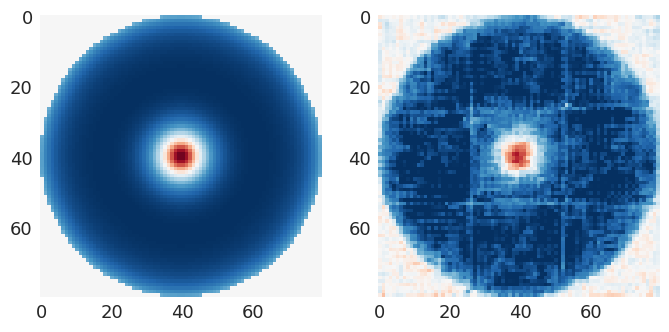

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

i = np.random.randint(0, len(test_set))
in_sim = test_set[i: i + 1]
in_sim = in_sim.to('cuda:0')
out_sim = model(in_sim)
in_sim = in_sim.detach().to('cpu').numpy()
in_sim = in_sim.reshape(in_sim.shape[0], in_sim.shape[2], in_sim.shape[3], in_sim.shape[1])
out_sim = out_sim.detach().to('cpu').numpy()
out_sim = out_sim.reshape(out_sim.shape[0], out_sim.shape[2], out_sim.shape[3], out_sim.shape[1])
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(in_sim[0, ..., 2], vmin=-1, vmax=1, cmap="RdBu")
ax[1].imshow(out_sim[0, ..., 2], vmin=-1, vmax=1, cmap="RdBu")

In [ ]:
# summarize the model
print(model)

Autoencoder(
  (encoder): Encoder(
    (layers): ModuleList(
      (0): Conv2dSame(3, 11, kernel_size=(5, 5), stride=(1, 1))
      (1): SELU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Conv2dSame(11, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): SELU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (6): Conv2dSame(10, 12, kernel_size=(5, 5), stride=(1, 1))
      (7): SELU()
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (9): Conv2dSame(12, 10, kernel_size=(5, 5), stride=(1, 1))
      (10): SELU()
      (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (12): Conv2dSame(10, 3, kernel_size=(5, 5), stride=(1, 1))
      (13): SELU()
      (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=True)
    )
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0): MaxUnpool2d(kernel_size=(5,

In [ ]:
from sklearn.model_selection import KFold


class KmeansLayer(torch.nn.Module):
    """Kmeans layer that inherits from PyTorch's nn.Module class."""

    def __init__(self, n_clusters, cluster_centers=None):
        super(KmeansLayer, self).__init__()
        self.n_clusters = n_clusters
        self.cluster_centers = cluster_centers

    def forward(self, x, cluster_centers):
        """Forward pass through the K-means layer."""
        # reshape input tensor
        x = x.view(x.size(0), -1)
        print(x.size())
        # initialize cluster centers if not provided
        if cluster_centers is None:
            cluster_centers = torch.nn.Parameter(
                x[torch.randperm(x.size(0))[:self.n_clusters]])
        # calculate distances between input and cluster centers
        distances = torch.cdist(x, cluster_centers)
        # get indices of the closest cluster center
        indices = torch.argmin(distances, dim=1)
        # update cluster centers
        cluster_centers = torch.stack(
            [x[indices == i].mean(0) for i in range(self.n_clusters)])
        # update cluster centers
        self.cluster_centers = cluster_centers

        return cluster_centers


class Classifier(torch.nn.Module):
    """Classifier that inherits from PyTorch's nn.Module class."""

    def __init__(self, input_dim, output_dim):
        super(Classifier, self).__init__()
        self.fc = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        """Forward pass through the classifier."""
        x = self.fc(x)
        return x


class JointAutoencoder(torch.nn.Module):
    def __init__(self, encoder, decoder, cluster):
        super(JointAutoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.cluster = cluster
        self.epochs = 10
        self.batch_size = 32
        self.data = train_set
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)

    def forward(self, x):
        """Forward pass through the ClusterAutoencoder."""
        x, indices_list = self.encoder(x)
        cluster_centers = self.cluster.cluster_centers
        cluster_centers = self.cluster(x, cluster_centers)
        x = self.decoder(x, indices_list)

        return x, cluster_centers

    def _get_reconstruction_loss(self, x, x_hat):
        """Calculate the reconstruction loss."""
        return torch.nn.functional.mse_loss(x_hat, x, reduction='mean')

    def _get_cluster_loss(self, x, cluster_centers):
        """Calculate the clustering loss."""
        x = self.encoder(x)[0]
        x = x.view(x.size(0), -1)
        cluster_loss = 0.0
        for i in range(self.cluster.n_clusters):
            print(x.size())
            x_cluster = x[cluster_centers == i]
            print(x_cluster.size())
            if x_cluster.size(0) > 0:
                a = torch.cdist(x_cluster, x_cluster).mean()
                b = torch.cdist(x_cluster, x[cluster_centers != i]).mean()
                s = (b - a) / torch.max(a, b)
                cluster_loss += s
        return cluster_loss
    
    def _get_weighted_mse_loss(self, x, cluster_centers):
        pass
        

    def _get_loss(self, x):
        """Calculate the loss function."""
        x_hat, cluster_centers = self(x)
        reconstruction_loss = self._get_reconstruction_loss(x, x_hat)
        cluster_loss = 0  # self._get_cluster_loss(x, cluster_centers)
        return reconstruction_loss + cluster_loss

    def train_model(self, dataloader, device=torch.device('cuda:0')):
        """Train the autoencoder."""
        self.to(device)
        self.train()
        for epoch in range(self.epochs):
            running_loss = 0.0
            for batch in dataloader:
                batch = batch.to(device)
                self.optimizer.zero_grad()
                loss = self._get_loss(batch)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item() * batch.size(0)
            epoch_loss = running_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{self.epochs} Loss: {epoch_loss:.4f}")

    def evaluate_model(self, dataloader, device=torch.device('cuda:0')):
        """Evaluate the autoencoder."""
        self.to(device)
        self.eval()
        total_loss = 0.0
        with torch.no_grad():
            for batch in dataloader:
                batch = batch.to(device)
                loss = self._get_loss(batch)
                total_loss += loss.item() * batch.size(0)
        avg_loss = total_loss / len(dataloader)
        print(f"Validation Loss: {avg_loss:.4f}")
        return avg_loss

    def cross_val(self, n_splits=5):
        """Perform cross-validation on the autoencoder."""
        torch.backends.cudnn.benchmark = True
        kf = KFold(n_splits=n_splits, shuffle=True)
        val_losses = []
        for fold, (train_index, val_index) in enumerate(kf.split(self.data)):
            print(f"Fold {fold+1}/{n_splits}")
            train_sampler = torch.utils.data.SubsetRandomSampler(train_index)
            val_sampler = torch.utils.data.SubsetRandomSampler(val_index)

            train_loader = torch.utils.data.DataLoader(
                self.data,
                sampler=train_sampler,
                batch_size=self.batch_size,
                num_workers=12)
            val_loader = torch.utils.data.DataLoader(
                self.data,
                sampler=val_sampler,
                batch_size=self.batch_size,
                num_workers=12)

            self.train_model(train_loader)
            val_loss = self.evaluate_model(val_loader)
            val_losses.append(val_loss)
        return val_losses


# train model with best hyperparameters
num_layers, poolsize, channels, kernel_sizes, dilations, activations = search_space(
    study.best_trial, input_dim=3, output_dim=3)

model = Autoencoder(num_layers=num_layers,
                    poolsize=poolsize,
                    channels=channels,
                    kernel_sizes=kernel_sizes,
                    dilations=dilations,
                    activations=activations,
                    epochs=10,
                    batch_size=32,
                    learning_rate=1e-3,
                    data=train_set)

model = JointAutoencoder(model.encoder, model.decoder,
                         KmeansLayer(n_clusters=20))

# model.cross_val()